In [1]:
!pip install ultralytics

In [2]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

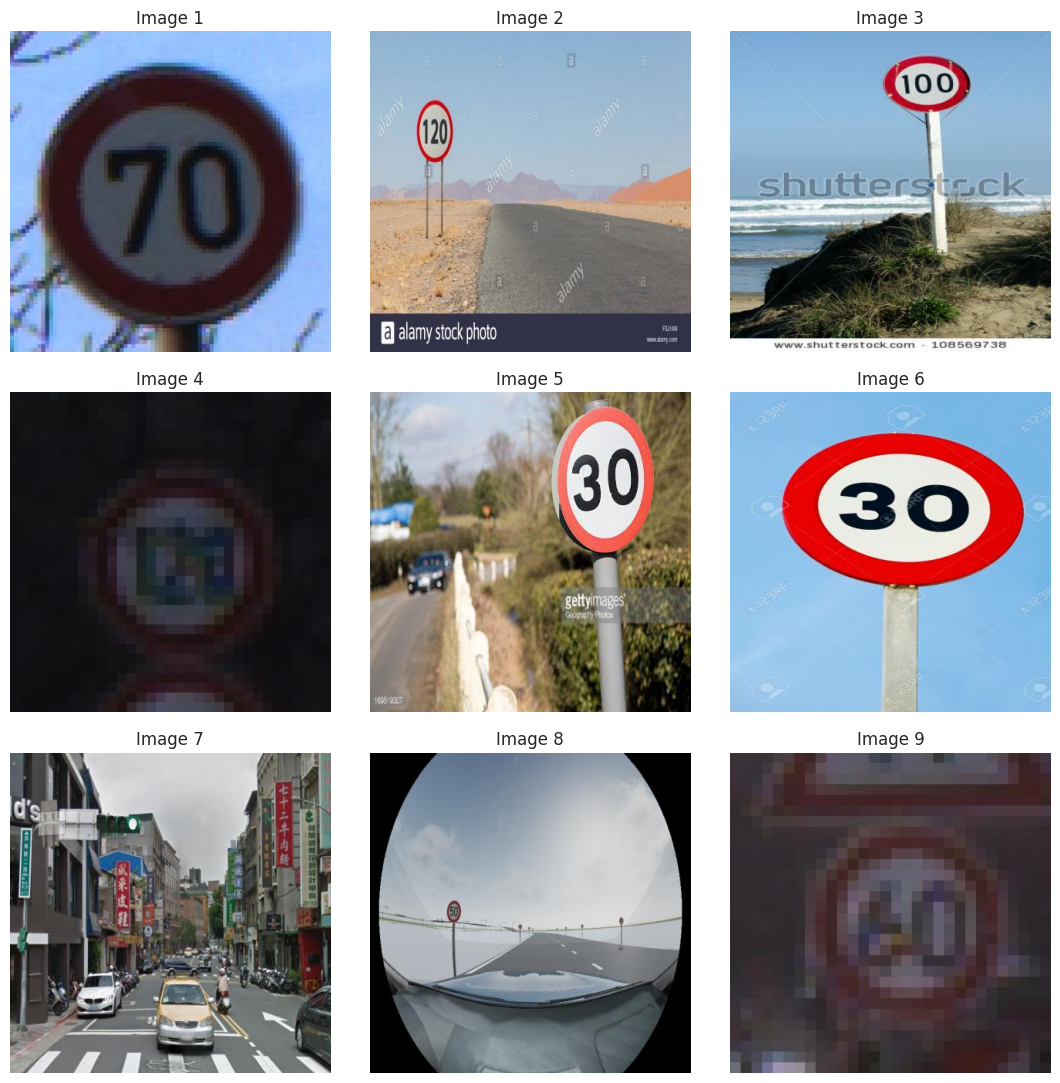

In [4]:
Image_dir = '/kaggle/input/cardetection/car/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [5]:
# Get the size of the image
image = cv2.imread("/kaggle/input/cardetection/car/train/images/00000_00000_00012_png.rf.23f94508dba03ef2f8bd187da2ec9c26.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.



image 1/1 /kaggle/input/cardetection/car/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg: 640x640 (no detections), 8.8ms
Speed: 4.4ms preprocess, 8.8ms inference, 51.0ms postprocess per image at shape (1, 3, 640, 640)


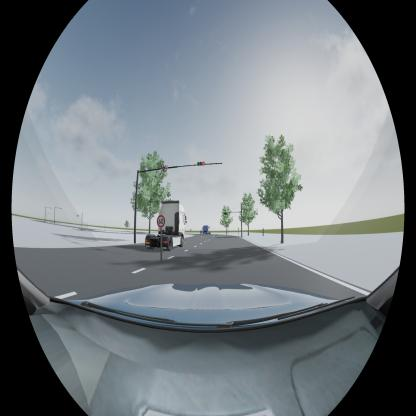

In [6]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt") 

# Use the model to detect object
image = "/kaggle/input/cardetection/car/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [7]:
!pip install --upgrade ultralytics ray

In [8]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.pt')  

# Training The Final Model
Result_Final_model = Final_model.train(data="/kaggle/input/cardetection/car/data.yaml",epochs = 30, batch = -1, optimizer = 'auto')

Ultralytics 8.3.85 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/cardetection/car/data.yaml, epochs=30, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

train: Scanning /kaggle/input/cardetection/car/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:05<00:00, 610.00it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.74G total, 0.11G reserved, 0.08G allocated, 14.55G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     3013773       8.209         0.403         37.14         175.4        (1, 3, 640, 640)                    list
     3013773       16.42         0.547         21.92         85.66        (2, 3, 640, 640)                    list
     3013773       32.84         0.868          25.8         77.13        (4, 3, 640, 640)                    list
     3013773       65.67         1.437      

train: Scanning /kaggle/input/cardetection/car/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:03<00:00, 922.82it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/cardetection/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:01<00:00, 644.43it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.000890625), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      13.6G     0.9407      4.025      1.263        251        640: 100%|██████████| 31/31 [00:34<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.27s/it]

                   all        801        944     0.0509      0.722     0.0898      0.075



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      13.5G     0.7381      2.896        1.1        254        640: 100%|██████████| 31/31 [00:32<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.35s/it]

                   all        801        944      0.515      0.216      0.232      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      13.5G      0.725       2.39      1.069        243        640: 100%|██████████| 31/31 [00:32<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.32s/it]

                   all        801        944      0.354      0.439      0.352      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      13.5G      0.697       2.11      1.063        251        640: 100%|██████████| 31/31 [00:34<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.52s/it]

                   all        801        944      0.492      0.514      0.499      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      13.5G      0.689      1.822      1.043        246        640: 100%|██████████| 31/31 [00:34<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.41s/it]

                   all        801        944      0.533      0.543       0.54       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      13.5G      0.652      1.579      1.026        232        640: 100%|██████████| 31/31 [00:34<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.39s/it]

                   all        801        944      0.747        0.7      0.767      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      13.5G       0.64      1.421       1.02        236        640: 100%|██████████| 31/31 [00:34<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.41s/it]

                   all        801        944       0.77      0.741      0.809      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      13.5G     0.6271      1.302      1.008        243        640: 100%|██████████| 31/31 [00:33<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.39s/it]

                   all        801        944      0.823      0.747      0.843      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      13.5G     0.6218      1.209      1.002        238        640: 100%|██████████| 31/31 [00:33<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.32s/it]

                   all        801        944      0.839      0.766      0.849      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      13.5G      0.612      1.119     0.9963        252        640: 100%|██████████| 31/31 [00:33<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.38s/it]

                   all        801        944      0.902      0.791      0.883      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      13.5G     0.6089      1.066     0.9941        247        640: 100%|██████████| 31/31 [00:34<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.35s/it]

                   all        801        944      0.903      0.796      0.885      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      13.5G     0.5957      1.017      0.992        267        640: 100%|██████████| 31/31 [00:33<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.36s/it]

                   all        801        944      0.912      0.797      0.888      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      13.6G     0.5932     0.9603     0.9878        244        640: 100%|██████████| 31/31 [00:33<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.39s/it]

                   all        801        944       0.92      0.826      0.907      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      13.5G     0.5703     0.9083     0.9759        246        640: 100%|██████████| 31/31 [00:33<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.39s/it]

                   all        801        944      0.915      0.814      0.904       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      13.6G      0.572     0.8864     0.9773        213        640: 100%|██████████| 31/31 [00:32<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.39s/it]

                   all        801        944      0.929      0.816      0.911      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      13.6G     0.5679     0.8611       0.98        248        640: 100%|██████████| 31/31 [00:33<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.37s/it]

                   all        801        944       0.92      0.842      0.916      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      13.6G       0.56     0.8212     0.9709        254        640: 100%|██████████| 31/31 [00:35<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.38s/it]

                   all        801        944      0.922      0.852      0.927      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      13.5G     0.5545     0.8085     0.9683        246        640: 100%|██████████| 31/31 [00:34<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.35s/it]

                   all        801        944      0.894      0.854      0.919      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      13.6G      0.545     0.7747     0.9699        256        640: 100%|██████████| 31/31 [00:34<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.37s/it]

                   all        801        944      0.932       0.87      0.941      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      13.5G      0.547     0.7461     0.9612        234        640: 100%|██████████| 31/31 [00:34<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.31s/it]

                   all        801        944      0.946      0.876      0.943      0.807


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      13.5G     0.5556     0.6485     0.9356        126        640: 100%|██████████| 31/31 [00:36<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.31s/it]

                   all        801        944      0.914      0.881      0.938      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      13.4G     0.5409     0.6036     0.9293        142        640: 100%|██████████| 31/31 [00:31<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.32s/it]

                   all        801        944      0.931      0.865      0.939      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      13.5G      0.532     0.5655     0.9297        120        640: 100%|██████████| 31/31 [00:32<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.26s/it]

                   all        801        944      0.943      0.875      0.946      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      13.4G     0.5218     0.5324     0.9186        137        640: 100%|██████████| 31/31 [00:31<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.41s/it]

                   all        801        944      0.916      0.885      0.942      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      13.6G     0.5215     0.5177     0.9174        132        640: 100%|██████████| 31/31 [00:31<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.36s/it]

                   all        801        944      0.958      0.892      0.954      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      13.6G      0.509      0.495     0.9118        133        640: 100%|██████████| 31/31 [00:32<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.29s/it]

                   all        801        944      0.939      0.891      0.957      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      13.5G     0.5019     0.4806     0.9098        137        640: 100%|██████████| 31/31 [00:31<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.34s/it]

                   all        801        944      0.947      0.904      0.956      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      13.5G     0.5032      0.467     0.9068        141        640: 100%|██████████| 31/31 [00:31<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.30s/it]

                   all        801        944      0.945      0.909      0.957      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      13.5G     0.4923     0.4542     0.9046        143        640: 100%|██████████| 31/31 [00:31<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.29s/it]

                   all        801        944      0.944      0.913      0.961      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      13.5G      0.487     0.4387     0.9034        130        640: 100%|██████████| 31/31 [00:30<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.35s/it]

                   all        801        944      0.946      0.907      0.961      0.834



30 epochs completed in 0.331 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.3MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.85 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.03s/it]


                   all        801        944      0.946      0.907      0.962      0.834
           Green Light         87        122      0.923      0.688      0.849      0.488
             Red Light         74        108      0.873      0.766      0.837      0.523
       Speed Limit 100         52         52      0.968      0.942      0.983      0.889
       Speed Limit 110         17         17      0.765      0.941      0.972      0.898
       Speed Limit 120         60         60          1      0.954      0.995      0.924
        Speed Limit 20         56         56      0.987      0.982      0.986      0.879
        Speed Limit 30         71         74      0.935      0.959      0.987       0.93
        Speed Limit 40         53         55      0.914      0.967       0.99      0.884
        Speed Limit 50         68         71      0.966      0.873      0.963      0.862
        Speed Limit 60         76         76      0.999      0.921      0.972      0.892
        Speed Limit 7

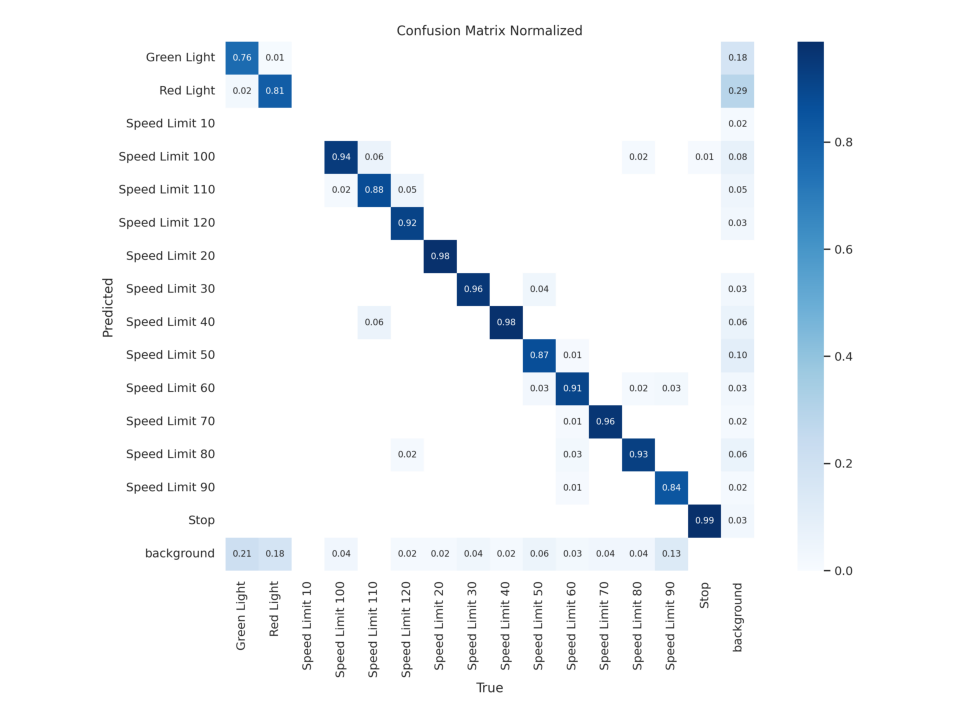

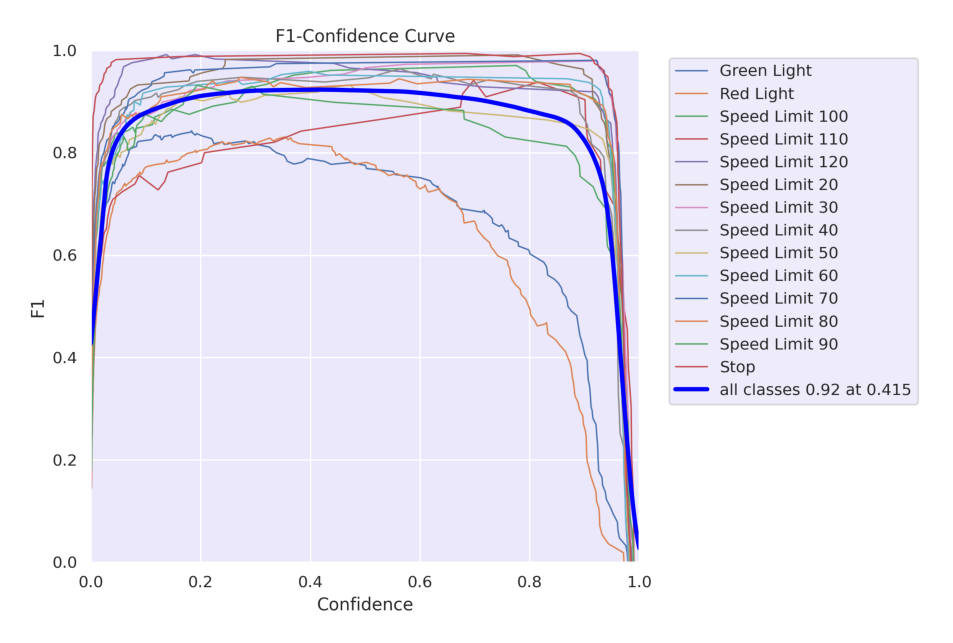

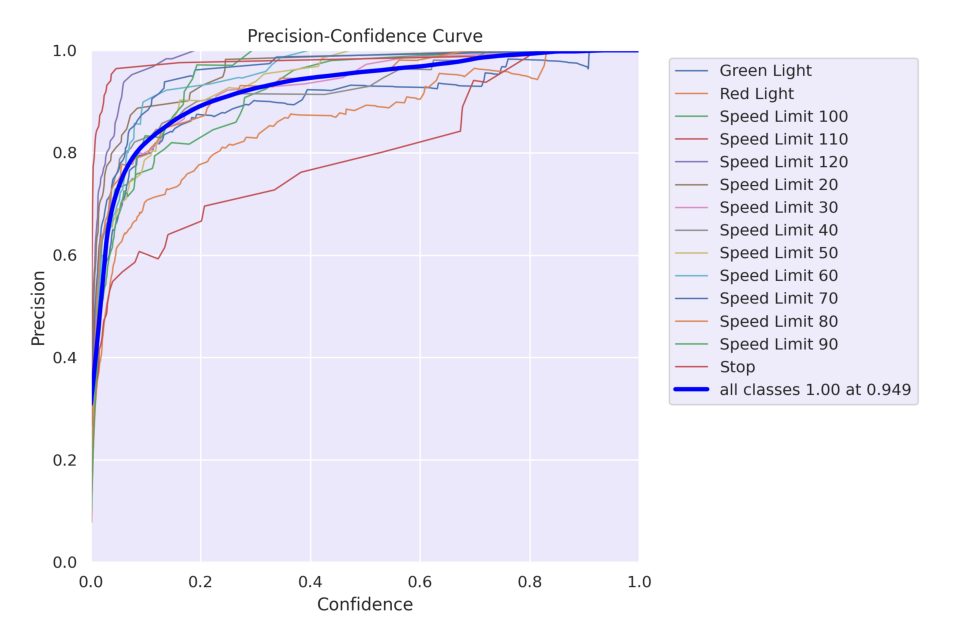

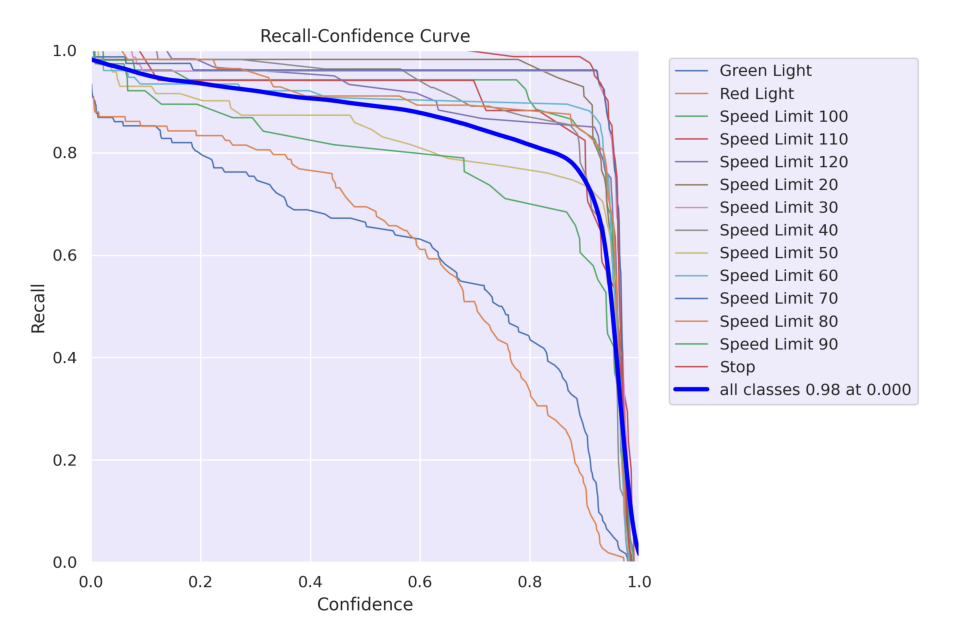

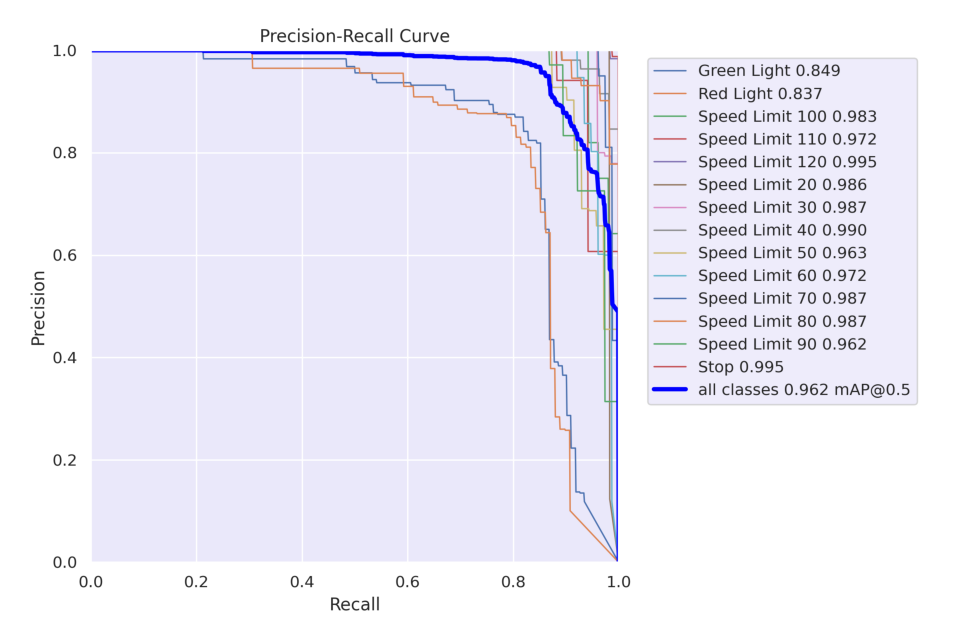

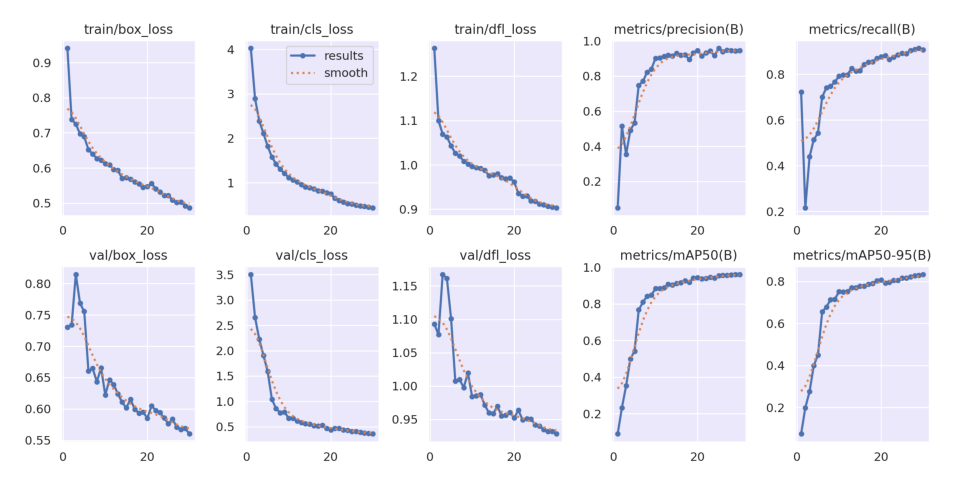

In [9]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = '/kaggle/working/runs/detect/train'

# Display the images
display_images(post_training_files_path, image_files)

In [10]:
# Loading the best performing model
Valid_model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# Evaluating the model on the validset
metrics = Valid_model.val(split = 'val')

# final results 
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics 8.3.85 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/cardetection/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:01<00:00, 633.34it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:07<00:00,  7.04it/s]


                   all        801        944      0.945      0.907      0.961      0.835
           Green Light         87        122      0.917      0.689      0.844      0.491
             Red Light         74        108      0.873      0.766      0.835      0.525
       Speed Limit 100         52         52      0.967      0.942      0.983       0.89
       Speed Limit 110         17         17      0.764      0.941      0.972      0.902
       Speed Limit 120         60         60          1      0.954      0.995      0.924
        Speed Limit 20         56         56      0.987      0.982      0.986      0.877
        Speed Limit 30         71         74      0.934      0.959      0.987      0.929
        Speed Limit 40         53         55      0.914      0.968       0.99      0.885
        Speed Limit 50         68         71      0.965      0.873      0.963      0.859
        Speed Limit 60         76         76      0.998      0.921      0.972      0.894
        Speed Limit 7


0: 640x640 1 Speed Limit 50, 1 Speed Limit 80, 7.4ms
Speed: 2.2ms preprocess, 7.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 110, 7.4ms
Speed: 2.0ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 120, 7.4ms
Speed: 1.7ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 40, 7.4ms
Speed: 1.7ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 120, 7.4ms
Speed: 1.6ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 120, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Stop, 7.4ms
Speed: 1.6ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 80, 7.4ms
Speed: 2.1ms preprocess, 7.4

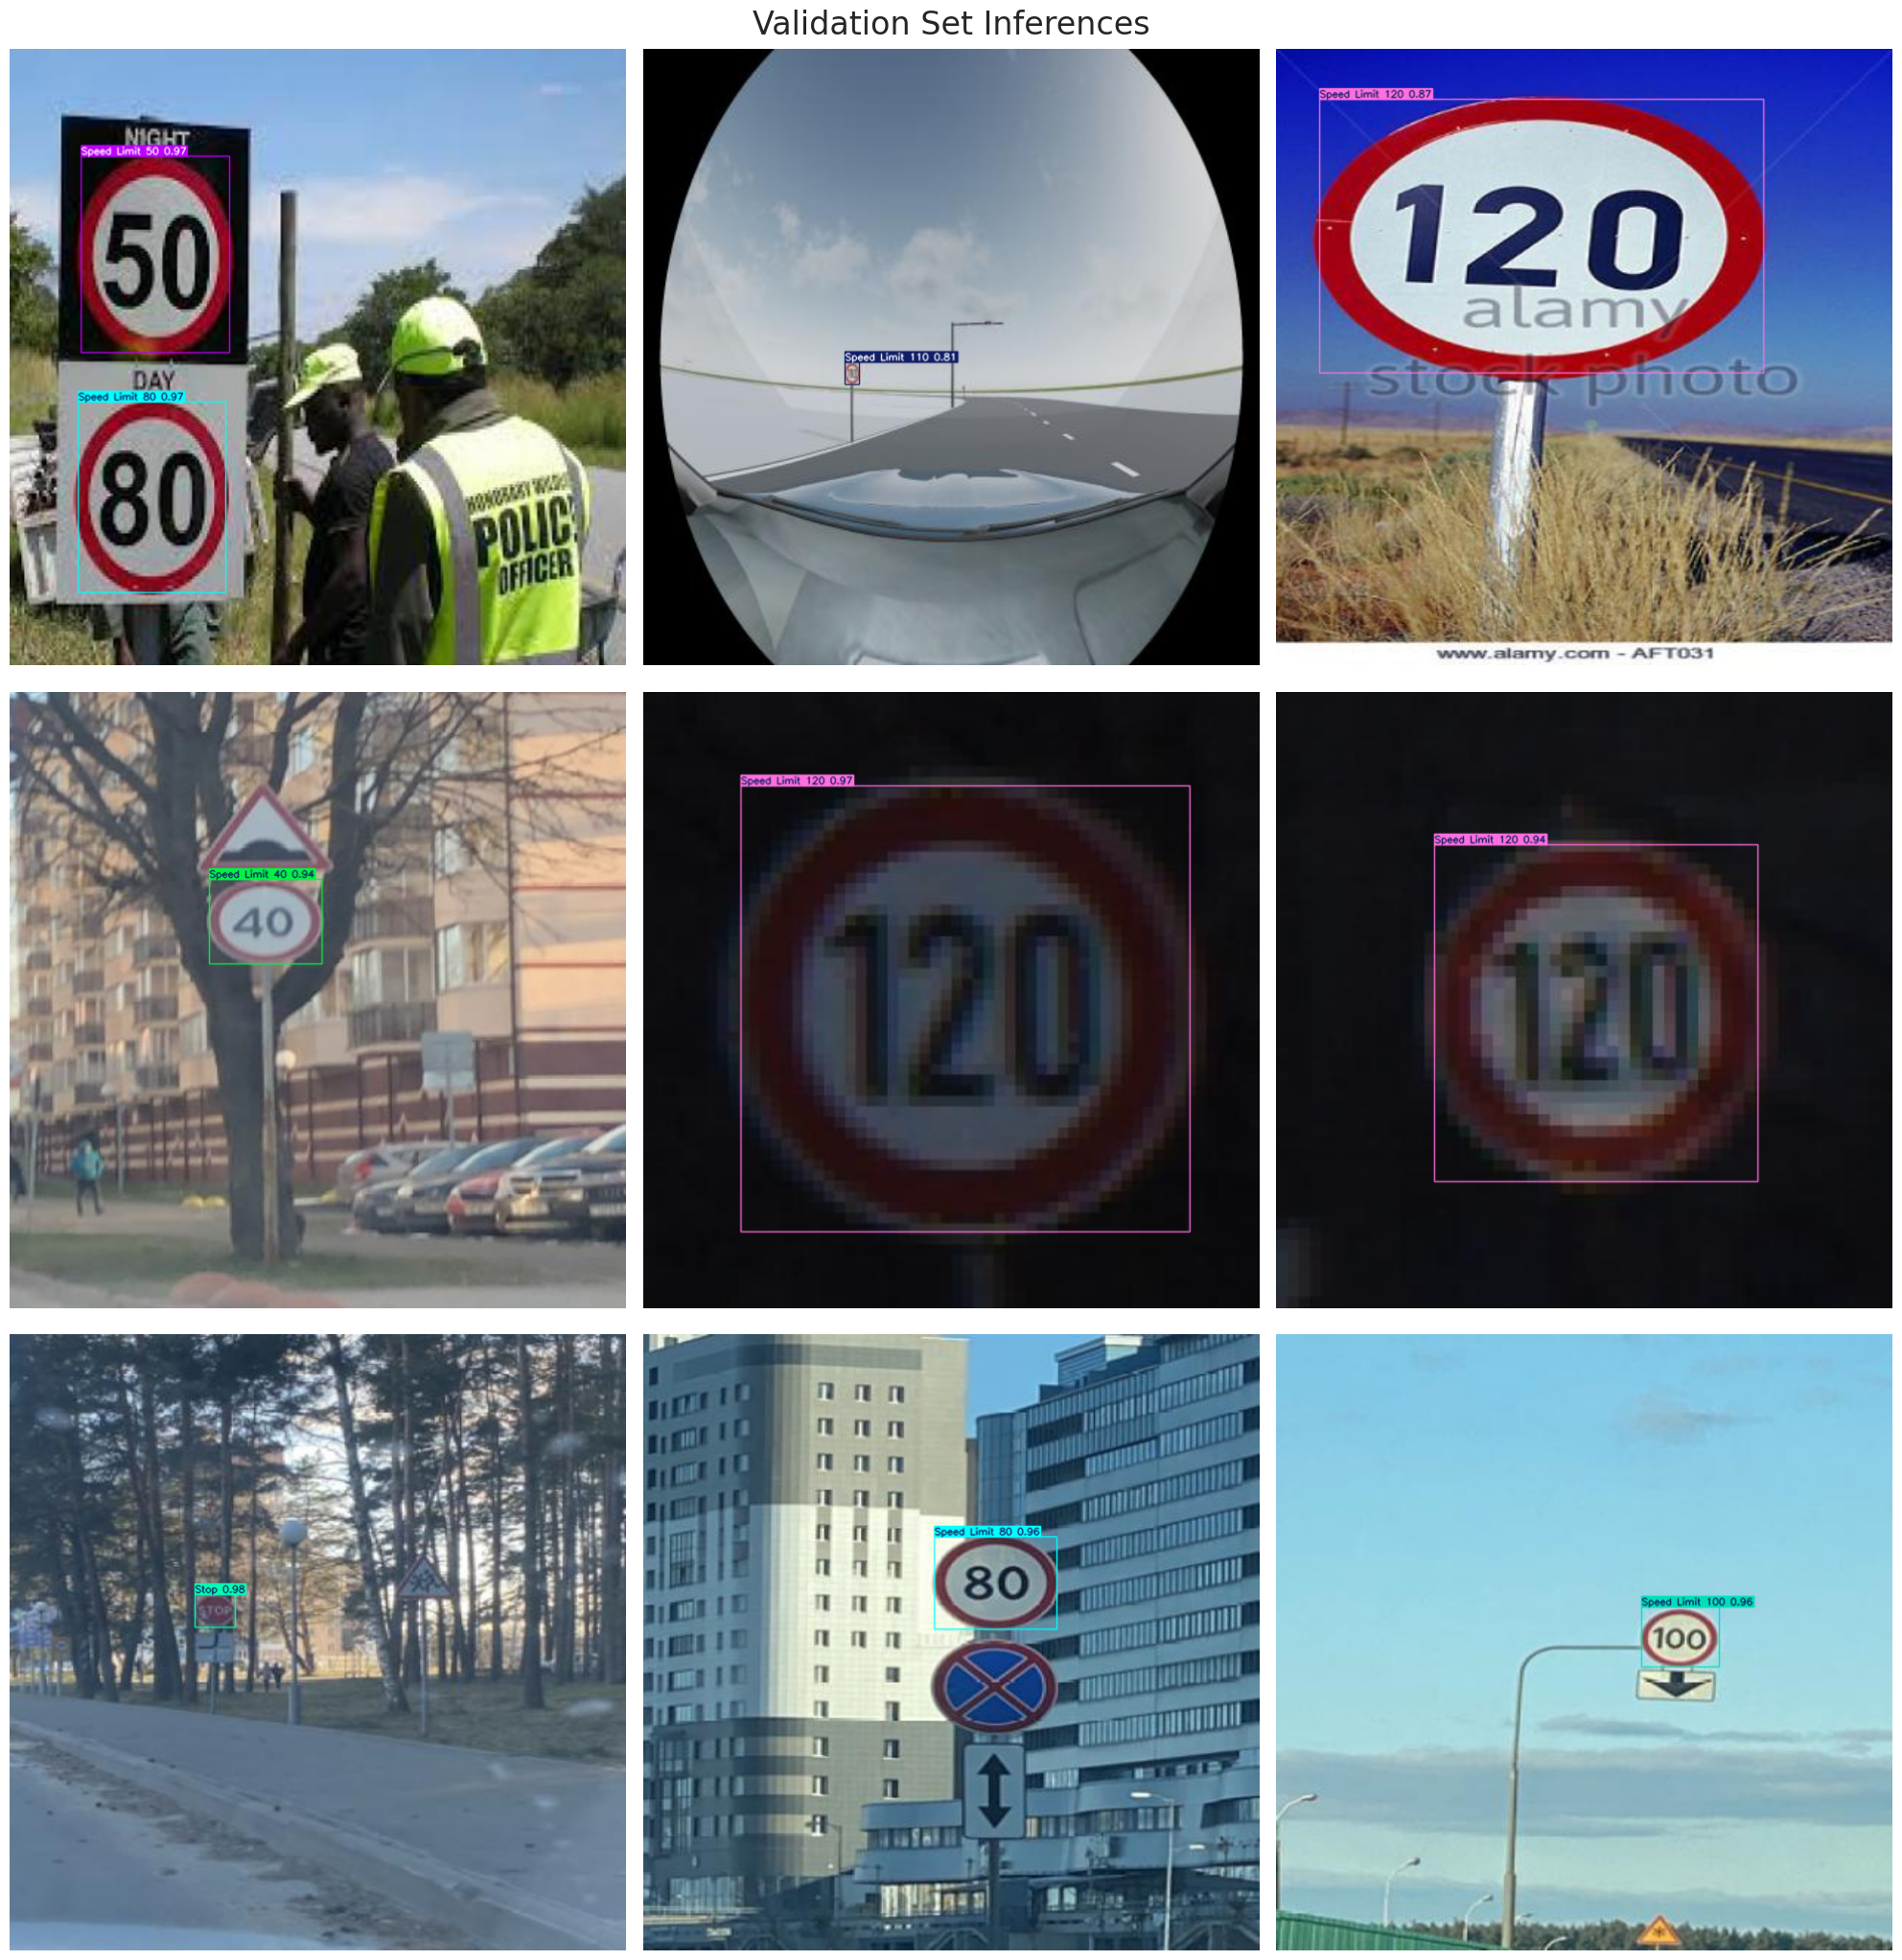

In [11]:
def normalize_image(image):
    return image / 255.0

# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Path to validation images
dataset_path = '/kaggle/input/cardetection/car'  # Place your dataset path here
valid_images_path = os.path.join(dataset_path, 'test', 'images')

# List of all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Check if there are images in the directory
if len(image_files) > 0:
    # Select 9 images at equal intervals
    num_images = len(image_files)
    step_size = max(1, num_images // 9)  # Ensure the interval is at least 1
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]

    # Prepare subplots
    fig, axes = plt.subplots(3, 3, figsize=(20, 21))
    fig.suptitle('Validation Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])
            
            # Load image
            image = cv2.imread(image_path)
            
            # Check if the image is loaded correctly
            if image is not None:
                # Resize image
                resized_image = resize_image(image, size=(640, 640))
                # Normalize image
                normalized_image = normalize_image(resized_image)
                
                # Convert the normalized image to uint8 data type
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)
                
                # Predict with the model
                results = Valid_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)
                
                # Plot image with labels
                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

In [12]:
# Convert mp4
!ffmpeg -y -loglevel panic -i /kaggle/input/cardetection/video.mp4 output.mp4

# Display markdown heading in a separate cell, or using display
from IPython.display import display, Markdown

display(Markdown("## <b>6 <span style='color:#e61227'>|</span> Export The Final Model Of Detect Traffic Signs </b>"))

# Display the video
Video("output.mp4", width=960)

## <b>6 <span style='color:#e61227'>|</span> Export The Final Model Of Detect Traffic Signs </b>

In [ ]:
results = Valid_model.predict(source="/kaggle/input/cardetection/video.mp4", show=True, save=True, stream=True)

for r in results:
    # Process each frame's results here
    boxes = r.boxes  # Boxes object for bbox outputs
    masks = r.masks  # Masks object for segment masks outputs
    probs = r.probs  # Class probabilities for classification outputs
    # ... your processing code ...

In [ ]:
# show result
# Convert format
!ffmpeg -y -loglevel panic -i /kaggle/working/runs/detect/predict/video.avi result_out.mp4

# Display the video 
Video("result_out.mp4", width=960)

In [ ]:
# Export the model
Valid_model.export(format='onnx')